In [1]:
import skvideo.io
import skvideo.datasets

In [2]:
videogen = skvideo.io.vread('./video/Tumakas and Diablo by Randy Q Villanueva(1).mp4')

In [55]:
frame = videogen[205]

In [246]:
from PIL import Image, ImageFilter

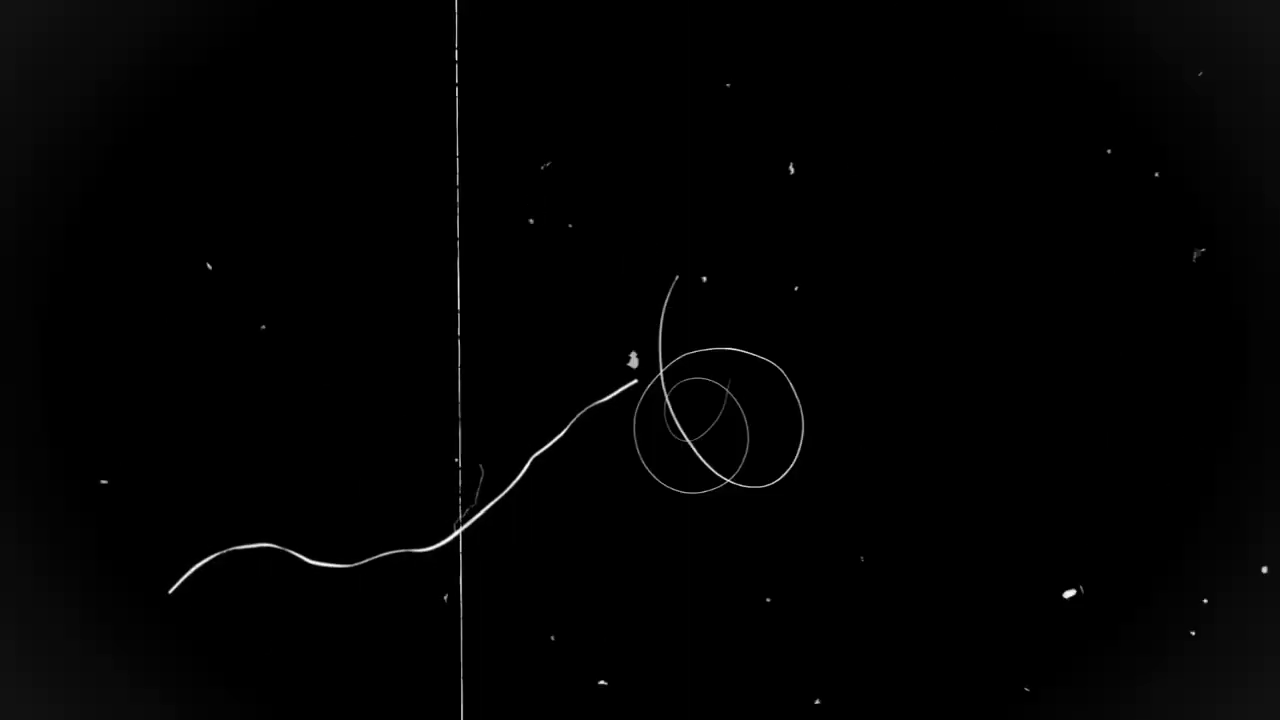

In [176]:
mask = Image.fromarray(frame).convert("L")
mask

In [231]:
image = Image.open("./test.jpg").convert("RGBA")

In [232]:
import numpy as np

In [233]:
def convert_mask(image, resize):
    mask = Image.fromarray(image).convert("L")
    mask = mask.resize(resize, Image.ANTIALIAS)
    mask = np.invert(mask)
    mask[mask<190] = 0
    mask[mask>=190] = 255
    bit_mask = mask
    alpha = mask
    mask = Image.fromarray(mask)
    r = mask.split()
    alpha_r = r[0].point(lambda p: 255-p)
    mask.putalpha(alpha_r)
    mask = mask.convert("RGBA")
    return mask, np.invert(bit_mask)

In [234]:
import random

In [235]:
def create_dirty(resize, defect_count):
    masks = []
    for i in range(defect_count):
        index = random.randint(0, len(videogen))
        _, bit_mask = convert_mask(videogen[index], resize)
        masks.append(bit_mask)
    return masks

In [241]:
merged_mask = create_dirty(image.size, 10)

In [256]:
np_merged_mask = merged_mask[0]
for new_mask in merged_mask[1:]:
    np_merged_mask += new_mask

In [264]:
mr_defect, mr_mask = convert_mask(np_merged_mask, image.size)
mr_defect=mr_defect.filter(ImageFilter.BoxBlur(1))

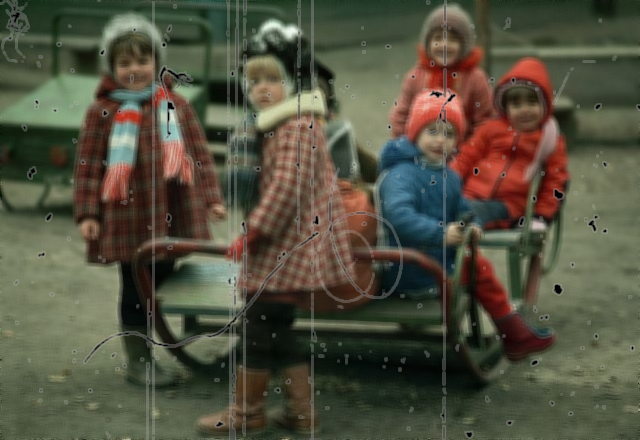

In [265]:
Image.alpha_composite(image, mr_defect)

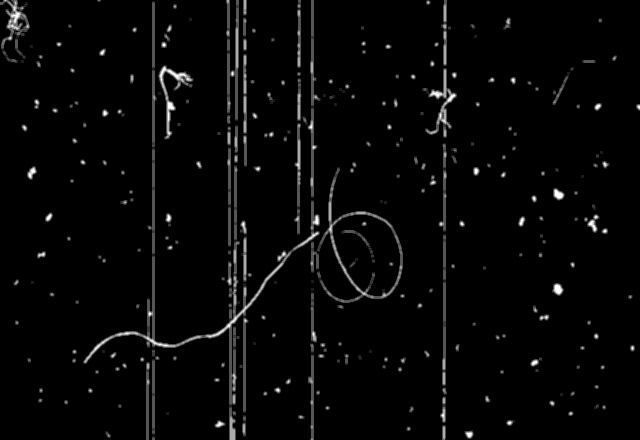

In [266]:
Image.fromarray(mr_mask).filter(ImageFilter.BoxBlur(1))